# Pseudo-Code

Write loop to create ignition dates
    appending the appropriate year to each

Compare IgntDate to ContrlDate to identify matching null values, then replace null IgntDate with interpolated date
    
Calculate time to control 1 acre of fire
    fill in missing control dates
    fill in missing ignition dates

In [2]:
# Load desired packages

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import fiona

# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

In [564]:
# Load data

fires20s = gpd.read_file('../data/fire20s.geojson')

In [257]:
# Inspect data

fires20s.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FireName    2581 non-null   object  
 1   FireYear    2581 non-null   int64   
 2   IgntDate    13 non-null     object  
 3   ContrlDate  267 non-null    object  
 4   ContnDate   14 non-null     object  
 5   Acres       2581 non-null   float64 
 6   Hectares    2581 non-null   float64 
 7   FireCause   2581 non-null   object  
 8   FireQual    2581 non-null   int64   
 9   Shape_Leng  2581 non-null   float64 
 10  Shape_Area  2581 non-null   float64 
 11  geometry    2581 non-null   geometry
dtypes: float64(4), geometry(1), int64(2), object(5)
memory usage: 242.1+ KB


In [15]:
# Look at null values

fires20s.isnull().sum()

FireName         0
FireYear         0
IgntDate      2568
ContrlDate    2314
ContnDate     2567
Acres            0
Hectares         0
FireCause        0
FireQual         0
Shape_Leng       0
Shape_Area       0
geometry         0
dtype: int64

In [572]:
# Identify which fires have no Ignition Date or Control Date, to get a number for how many records will be corrected

noIgntCtrlDate = fires20s[(fires20s.IgntDate.isnull()) & (fires20s.ContrlDate.isnull())]

noIgntCtrlDate.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2301 entries, 6 to 2577
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FireName    2301 non-null   object  
 1   FireYear    2301 non-null   int64   
 2   IgntDate    0 non-null      object  
 3   ContrlDate  0 non-null      object  
 4   ContnDate   0 non-null      object  
 5   Acres       2301 non-null   float64 
 6   Hectares    2301 non-null   float64 
 7   FireCause   2301 non-null   object  
 8   FireQual    2301 non-null   int64   
 9   Shape_Leng  2301 non-null   float64 
 10  Shape_Area  2301 non-null   float64 
 11  geometry    2301 non-null   geometry
dtypes: float64(4), geometry(1), int64(2), object(5)
memory usage: 233.7+ KB


In [573]:
# Write loop to pull years and add to date for ignition date

fireYear = fires20s.FireYear
yr = []
dt = []

for year in fireYear:
    yr.append(year)
    
for year in yr:
    dt.append('6/1/' + str(year))
    
dt

['6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',
 '6/1/1920',

## Infinite Loop?

It seems the next block runs indefinitely. I can't really wrap my head around why it doesn't stop

In [570]:
# If IgntDate is null, compare that to ContrlDate, if ContrlDate == IgntDate, then replace null IgntDate with dt

fireYear = fires20s.FireYear
iDate = fires20s.IgntDate.isnull()
cDate = fires20s.ContrlDate.isnull()


for i in iDate:
    if i == True:
        checkCDate(i)

def checkCDate(x):
    for i in cDate:
        if i == x:
            print('match')
           # fires20s['IgntDate'] = dt


        


match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
match
matc

KeyboardInterrupt: 

In [ ]:
# Verify the corrected IgntDates

fires20s

In [575]:
# Convert IgntDate to datetime

fires20s['IgntDate'] = pd.to_datetime(fires20s.IgntDate)

In [576]:
# Verify conversion

fires20s.IgntDate

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
2576   NaT
2577   NaT
2578   NaT
2579   NaT
2580   NaT
Name: IgntDate, Length: 2581, dtype: datetime64[ns]

In [577]:
# Convert ContrlDate to datetime

fires20s['ContrlDate'] = pd.to_datetime(fires20s.ContrlDate)

In [579]:
# Verify conversion

fires20s.ContrlDate

0      1920-07-01
1      1920-07-01
2      1920-05-27
3      1920-05-27
4      1920-08-05
          ...    
2576          NaT
2577          NaT
2578   1929-09-09
2579   1929-08-05
2580   1929-08-16
Name: ContrlDate, Length: 2581, dtype: datetime64[ns]

In [590]:
# One conditional statement to check if both IgntDate and ContrlDate are null

fireYear = fires20s.FireYear
igDate = [fires20s.IgntDate.isnull()]
ctrlDate = [fires20s.ContrlDate.isnull()]

for i in fires20s.FireYear:
    if (igDate == True) and (ctrlDate == True):
        print('match')
    else:
        print('not a match')

not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not 

not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not a match
not 

# Calculating Burn Times

Find a dataset where records have Ignition and Control dates to write a function that can calculate time to control one acre of fire

In [598]:
# Check for records with Ignition and Control Dates

yesIgDateCtrlDate = fires20s[(fires20s.IgntDate.notnull()) & (fires20s.ContrlDate.notnull())]

In [600]:
# Check results

yesIgDateCtrlDate.head()

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,FireQual,Shape_Leng,Shape_Area,geometry


In [601]:
# Load different dataset to calculate burn times

fires90s = gpd.read_file('../data/fire90s.geojson')

In [602]:
# Inspect data

fires90s.head()

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,FireQual,Shape_Leng,Shape_Area,geometry
0,031035,1990,1990-07-03,None,None,5985.810998,2422.373910,No cause indicated,1,48195.400491,2.422374e+07,"POLYGON ((-149.78729 65.15126, -149.78496 65.1..."
1,031037,1990,1990-07-03,None,None,2987.550300,1209.019781,No cause indicated,1,32316.402210,1.209020e+07,"POLYGON ((-149.85790 65.57808, -149.85341 65.5..."
2,031039,1990,1990-07-05,None,None,2002.419784,810.351253,No cause indicated,1,26092.991716,8.103513e+06,"MULTIPOLYGON (((-152.62072 66.77904, -152.6166..."
3,031042,1990,1990-07-07,None,None,1739.706275,704.034774,No cause indicated,1,15598.590347,7.040348e+06,"POLYGON ((-149.42663 65.63462, -149.42523 65.6..."
4,032018,1990,1990-06-27,None,None,333570.712700,134991.397440,No cause indicated,1,663537.402132,1.349914e+09,"POLYGON ((-148.32038 66.78533, -148.31780 66.7..."


In [606]:
# Convert IgntDate and ContrlDate columns to datetime for easier calculations

fires90s['IgntDate'] = pd.to_datetime(fires90s.IgntDate)

fires90s['ContrlDate'] = pd.to_datetime(fires90s.ContrlDate)

In [607]:
# Check for records with Ignition and Control Dates

fullDates = fires90s[(fires90s.IgntDate.notnull()) & (fires90s.ContrlDate.notnull())]

In [608]:
# Let's see what we're working with here

fullDates.head()

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,FireQual,Shape_Leng,Shape_Area,geometry
902,BULLDOG,1993,1993-08-01,1993-08-04,None,1151.845182,466.135619,Unknown,1,14868.036527,4.661356e+06,"POLYGON ((-113.86058 37.02242, -113.85956 37.0..."
967,MILL CREEK,1993,1993-06-21,1993-06-23,None,3456.959077,1398.982941,Natural,1,23951.896471,1.398983e+07,"POLYGON ((-113.53524 37.22023, -113.53478 37.2..."
1108,WHITE ROCK,1993,1993-07-15,1993-07-19,None,3104.880685,1256.501745,Human,1,22563.222161,1.256502e+07,"POLYGON ((-114.02168 38.18800, -114.02107 38.1..."
1163,BULLOCH,1994,1994-07-22,1994-07-25,None,1702.961502,689.164679,Natural,1,16963.187545,6.891647e+06,"POLYGON ((-112.89457 37.40672, -112.89397 37.4..."
1173,CAVE CANYON,1994,1994-07-27,1994-08-15,None,1197.874480,484.763032,Natural,1,13209.277725,4.847630e+06,"POLYGON ((-112.88627 38.32879, -112.88582 38.3..."


In [610]:
# Verify datetime conversion

fullDates.dtypes

FireName              object
FireYear               int64
IgntDate      datetime64[ns]
ContrlDate    datetime64[ns]
ContnDate             object
Acres                float64
Hectares             float64
FireCause             object
FireQual               int64
Shape_Leng           float64
Shape_Area           float64
geometry            geometry
dtype: object

In [662]:
# Define function that will calculate time to burn one acre
# subtract control date from ignition date, then divide number of days by acreage.

# Declare variables
a = fullDates.IgntDate.dt.day_of_year
b = fullDates.ContrlDate.dt.day_of_year
c = []
days = []
daysPerAcre = []

for i in fullDates.Acres:
    c.append(int(i))

def calcBurns(a,b):
    days.append(b-a)
    
    
def daysAcre(c,days):
    d = np.array([days])/np.array([c])
    e = len(d)
    print(type(d))
    
    
        
        
    
calcBurns(a,b)

daysAcre(c,days)


print(daysPerAcre)

<class 'numpy.ndarray'>
[]


/usr/local/Caskroom/miniconda/base/envs/wildfires/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


# Fire Points and Polygons Merge

In [14]:
firePoints = gpd.read_file('../rawData/firePoints.geojson')

In [15]:
firePoly = gpd.read_file('../rawData/mtbs/mtbsPoly.shp')

In [16]:
firePoints

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2005-02-02T00:00:00,33,1300,9.0,Miscellaneous,2005-02-02T00:00:00,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,POINT (-121.00583 40.03694)
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2004-05-12T00:00:00,133,0845,1.0,Lightning,2004-05-12T00:00:00,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,POINT (-120.40444 38.93306)
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2004-05-31T00:00:00,152,1921,5.0,Debris Burning,2004-05-31T00:00:00,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,POINT (-120.73556 38.98417)
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2004-06-28T00:00:00,180,1600,1.0,Lightning,2004-07-03T00:00:00,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,POINT (-119.91333 38.55917)
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2004-06-28T00:00:00,180,1600,1.0,Lightning,2004-07-03T00:00:00,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,POINT (-119.93306 38.55917)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,591814,009371,None,ODESSA 2,None,None,None,None,None,2015,2015-09-26T00:00:00,269,1726,13.0,Missing/Undefined,2015-09-26T00:00:00,269.0,1843,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,POINT (-122.38938 40.48164)
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,569419,000366,None,None,None,None,None,None,None,2015,2015-10-05T00:00:00,278,0126,9.0,Miscellaneous,None,NaN,None,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,POINT (-120.93857 37.61762)
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,574245,000158,None,None,None,None,None,None,None,2015,2015-05-02T00:00:00,122,2052,13.0,Missing/Undefined,None,NaN,None,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,POINT (-120.93857 37.61762)
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,570462,000380,None,None,None,None,None,None,None,2015,2015-10-14T00:00:00,287,2309,13.0,Missing/Undefined,None,NaN,None,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,POINT (-120.89836 37.67223)


In [17]:
firePoly

,OBJECTID,FIRE_ID,FIRE_NAME,YEAR,STARTMONTH,STARTDAY,FIRE_TYPE,ACRES,SHAPE_Leng,SHAPE_Area,geometry
0,1.0,AK5761615232120150828,TWIN CREEKS,2015,8,28,Wildfire,3419.000000,0.548885,0.002078,"POLYGON ((-152.26796 57.62401, -152.26745 57.6..."
1,2.0,AK5884115754320150622,COPENHAGEN CREEK,2015,6,22,Wildfire,5335.000000,0.415451,0.003356,"POLYGON ((-157.54567 58.86262, -157.54487 58.8..."
2,3.0,AK5884415640120150621,PAULS CREEK,2015,6,21,Wildfire,9684.000000,0.681354,0.006095,"POLYGON ((-156.38570 58.88877, -156.38491 58.8..."
3,4.0,AK5890415740520150704,COPENHAGEN,2015,7,4,Wildfire,3208.000000,0.449502,0.002023,"POLYGON ((-157.44203 58.90169, -157.44121 58.9..."
4,5.0,AK5899315855220121102,SNAKE RIVER,2012,11,2,Wildfire,15244.000000,0.691039,0.009616,"POLYGON ((-158.73368 58.92751, -158.73397 58.9..."
...,...,...,...,...,...,...,...,...,...,...,...
22964,22965.0,WA4671511999020170720,400,2017,7,20,Wildfire,27218.537107,0.833794,0.012952,"POLYGON ((-120.05923 46.70194, -120.05908 46.7..."
22965,22966.0,UT3939111240620170606,COTTONWOOD TRAIL,2017,6,6,Wildfire,1279.015054,0.103871,0.000541,"POLYGON ((-112.42994 39.39148, -112.43004 39.3..."
22966,22967.0,UT3999411131620170812,TANK HOLLOW,2017,8,12,Wildfire,11003.511048,0.565152,0.004697,"POLYGON ((-111.20152 40.03977, -111.20134 40.0..."
22967,22968.0,UT4001210915820170616,MACK SHAFT,2017,6,16,Wildfire,2562.206467,0.184127,0.001094,"POLYGON ((-109.14127 40.01455, -109.14183 40.0..."


In [19]:
pointPoly = pd.merge(firePoints, firePoly, left_on='MTBS_ID', right_on='FIRE_ID')

In [20]:
pointPoly

,OBJECTID_x,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME_x,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry_x,OBJECTID_y,FIRE_ID,FIRE_NAME_y,YEAR,STARTMONTH,STARTDAY,FIRE_TYPE,ACRES,SHAPE_Leng,SHAPE_Area,geometry_y
0,17,17,FS-1418878,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,109,23,,POWER,CA-ENF-017646,POWER,CA3850212028020041006,POWER,None,2004,2004-10-06T00:00:00,280,1415,2.0,Equipment Use,2004-10-21T00:00:00,295.0,1000,16823.0,G,38.523333,-120.211667,5.0,USFS,CA,5,005,Amador,POINT (-120.21167 38.52333),3668.0,CA3850212028020041006,POWER,2004,10,6,Wildfire,17266.0,0.636746,0.007216,"POLYGON ((-120.37652 38.49250, -120.37632 38.4..."
1,18,18,FS-1418881,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,111,35,BHA3,FREDS,CA-ENF-18044,FREDS,CA3878712031820041013,FREDS,None,2004,2004-10-13T00:00:00,287,1618,2.0,Equipment Use,2004-10-17T00:00:00,291.0,1800,7700.0,G,38.780000,-120.260000,5.0,USFS,CA,17,017,El Dorado,POINT (-120.26000 38.78000),3764.0,CA3878712031820041013,FREDS,2004,10,13,Wildfire,8150.0,0.347113,0.003419,"POLYGON ((-120.27861 38.79849, -120.27855 38.7..."
2,189,192,FS-1419313,FED,FS-FIRESTAT,FS,USAZTNF,Tonto National Forest,0312,Tonto National Forest,62,4,BVR2,THREE,AZ-TNF-105,THREE FIRE COMPLEX,AZ3372311127120050621,THREE FIRE COMPLEX (THREE),THREE FIRE COMPLEX,2005,2005-06-21T00:00:00,172,1400,1.0,Lightning,2005-06-29T00:00:00,180.0,1800,16100.0,G,33.723333,-111.275000,5.0,USFS,AZ,7,007,Gila,POINT (-111.27500 33.72333),2046.0,AZ3372311127120050621,THREE FIRE COMPLEX (THREE),2005,6,21,Wildfire,15849.0,0.789170,0.006239,"POLYGON ((-111.31769 33.70993, -111.31842 33.7..."
3,549,556,FS-1420078,FED,FS-FIRESTAT,FS,USCASQF,Sequoia National Forest,0513,Sequoia National Forest,23,05,BZS6,NINE,CA-SQF-1857,NINE,CA3569311842220050709,NINE,None,2005,2005-07-09T00:00:00,190,1313,9.0,Miscellaneous,2005-07-10T00:00:00,191.0,1800,1149.0,F,35.688056,-118.438333,5.0,USFS,CA,None,None,None,POINT (-118.43833 35.68806),3156.0,CA3569311842220050709,NINE,2005,7,9,Wildfire,1240.0,0.135610,0.000500,"POLYGON ((-118.42280 35.70453, -118.42238 35.7..."
4,583,590,FS-1420201,FED,FS-FIRESTAT,FS,USAZTNF,Tonto National Forest,0312,Tonto National Forest,111,7,B0PP,OAK,AZ-TNF-136,Oak,AZ3393311135020050716,OAK,None,2005,2005-07-16T00:00:00,197,1720,1.0,Lightning,2005-07-20T00:00:00,201.0,1800,1300.0,F,33.933611,-111.379722,5.0,USFS,AZ,7,007,Gila,POINT (-111.37972 33.93361),2105.0,AZ3393311135020050716,OAK,2005,7,16,Wildfire,1451.0,0.164327,0.000573,"POLYGON ((-111.36164 33.92380, -111.36261 33.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10211,1878493,300338499,2015CAIRS27457136,NONFED,ST-CACDF,ST/C&L,USCAMMU,Merced-Mariposa Unit,CAMMU,CDF - Merced-Mariposa Unit,578472,011662,None,CORRINE,718367,Corrine,CA3716511951320150619,CORRINE,None,2015,2015-06-18T00:00:00,169,2103,9.0,Miscellaneous,None,NaN,None,920.0,E,37.168791,-119.499888,13.0,STATE OR PRIVATE,CA,None,None,None,POINT (-119.49989 37.16879),3999.0,CA3716511951320150619,CORRINE,2015,6,19,Wildfire,1064.0,0.143113,0.000437,"POLYGON ((-119.49419 37.18697, -119.49384 37.1..."
10212,1878524,300338871,2008CAIRS10419166,NONFED,ST-CACDF,ST/C&L,USCABTU,Butte Unit,CABTU,Butte Unit,127648,007089,None,HUMBOLDT,CA-BTU-007089,Humboldt,CA3970312168320080611,HUMBOLDT,None,2008,2008-06-11T00:00:00,163,1214,7.0,Arson,None,NaN,None,23344.0,G,39.762464,-121

In [21]:
pointPolyClean = pointPoly[(pointPoly.CONT_DATE.notnull()) & (pointPoly.DISCOVERY_DATE.notnull())]

In [22]:
pointPolyClean

,OBJECTID_x,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME_x,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry_x,OBJECTID_y,FIRE_ID,FIRE_NAME_y,YEAR,STARTMONTH,STARTDAY,FIRE_TYPE,ACRES,SHAPE_Leng,SHAPE_Area,geometry_y
0,17,17,FS-1418878,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,109,23,,POWER,CA-ENF-017646,POWER,CA3850212028020041006,POWER,None,2004,2004-10-06T00:00:00,280,1415,2.0,Equipment Use,2004-10-21T00:00:00,295.0,1000,16823.00,G,38.523333,-120.211667,5.0,USFS,CA,5,005,Amador,POINT (-120.21167 38.52333),3668.0,CA3850212028020041006,POWER,2004,10,6,Wildfire,17266.0,0.636746,0.007216,"POLYGON ((-120.37652 38.49250, -120.37632 38.4..."
1,18,18,FS-1418881,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,111,35,BHA3,FREDS,CA-ENF-18044,FREDS,CA3878712031820041013,FREDS,None,2004,2004-10-13T00:00:00,287,1618,2.0,Equipment Use,2004-10-17T00:00:00,291.0,1800,7700.00,G,38.780000,-120.260000,5.0,USFS,CA,17,017,El Dorado,POINT (-120.26000 38.78000),3764.0,CA3878712031820041013,FREDS,2004,10,13,Wildfire,8150.0,0.347113,0.003419,"POLYGON ((-120.27861 38.79849, -120.27855 38.7..."
2,189,192,FS-1419313,FED,FS-FIRESTAT,FS,USAZTNF,Tonto National Forest,0312,Tonto National Forest,62,4,BVR2,THREE,AZ-TNF-105,THREE FIRE COMPLEX,AZ3372311127120050621,THREE FIRE COMPLEX (THREE),THREE FIRE COMPLEX,2005,2005-06-21T00:00:00,172,1400,1.0,Lightning,2005-06-29T00:00:00,180.0,1800,16100.00,G,33.723333,-111.275000,5.0,USFS,AZ,7,007,Gila,POINT (-111.27500 33.72333),2046.0,AZ3372311127120050621,THREE FIRE COMPLEX (THREE),2005,6,21,Wildfire,15849.0,0.789170,0.006239,"POLYGON ((-111.31769 33.70993, -111.31842 33.7..."
3,549,556,FS-1420078,FED,FS-FIRESTAT,FS,USCASQF,Sequoia National Forest,0513,Sequoia National Forest,23,05,BZS6,NINE,CA-SQF-1857,NINE,CA3569311842220050709,NINE,None,2005,2005-07-09T00:00:00,190,1313,9.0,Miscellaneous,2005-07-10T00:00:00,191.0,1800,1149.00,F,35.688056,-118.438333,5.0,USFS,CA,None,None,None,POINT (-118.43833 35.68806),3156.0,CA3569311842220050709,NINE,2005,7,9,Wildfire,1240.0,0.135610,0.000500,"POLYGON ((-118.42280 35.70453, -118.42238 35.7..."
4,583,590,FS-1420201,FED,FS-FIRESTAT,FS,USAZTNF,Tonto National Forest,0312,Tonto National Forest,111,7,B0PP,OAK,AZ-TNF-136,Oak,AZ3393311135020050716,OAK,None,2005,2005-07-16T00:00:00,197,1720,1.0,Lightning,2005-07-20T00:00:00,201.0,1800,1300.00,F,33.933611,-111.379722,5.0,USFS,AZ,7,007,Gila,POINT (-111.37972 33.93361),2105.0,AZ3393311135020050716,OAK,2005,7,16,Wildfire,1451.0,0.164327,0.000573,"POLYGON ((-111.36164 33.92380, -111.36261 33.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10209,1877890,300335348,2014CAIRS25890061,NONFED,ST-CACDF,ST/C&L,USCAMEU,Mendocino Unit,CAMEU,Mendocino Unit,530211,007202,None,LODGE COMPLEX,731475,LODGE COMPLEX,CA3976812365020140730,LODGE COMPLEX,LODGE COMPLEX,2014,2014-07-30T00:00:00,211,1419,9.0,Miscellaneous,2014-09-09T00:00:00,252.0,1800,12535.00,G,39.833208,-123.631965,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,POINT (-123.63196 39.83321),3693.0,CA3976812365020140730,LODGE COMPLEX,2014,7,30,Wildfire,12300.0,0.433764,0.005233,"POLYGON ((-123.67159 39.81864, -123.67101 39.8..."
10210,1878194,300336987,2010CAIRS14306184,NONFED,ST-CACDF,ST/C&L,USCATUU,Tulare Unit,CATUU,Tulare Unit,474665,000098,None,BALES,None,None,CA3582111899420100604,BALES,None,2010,2010-06-04T00:00:00,155,1417,2.0,Equipment Use,2

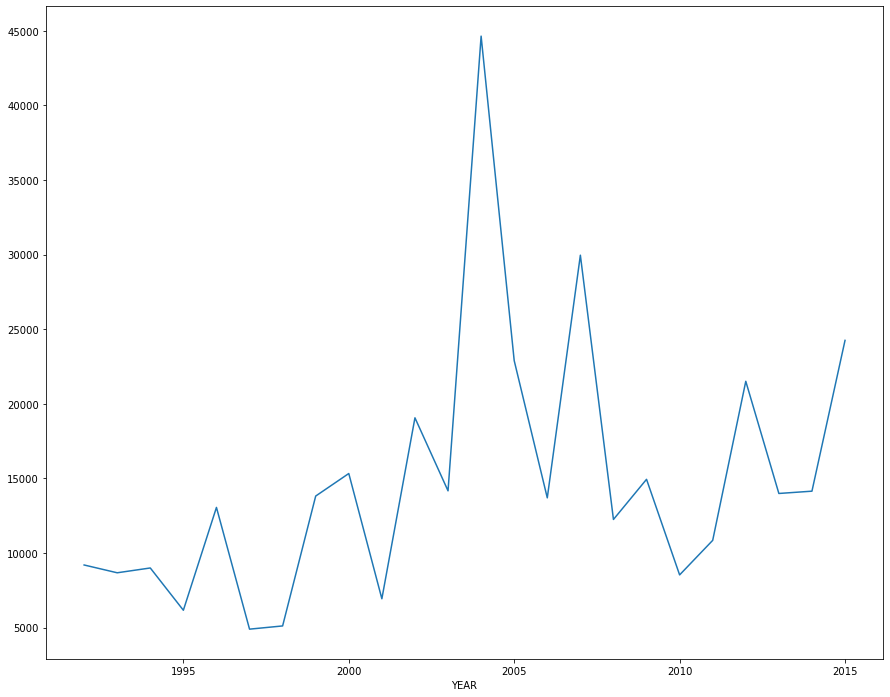

In [23]:
pointPolyClean.groupby('YEAR').ACRES.mean().plot();

In [28]:
pointPolyDF = pd.DataFrame(pointPolyClean)

In [30]:
pointPolyClean.to_csv('../rawData/pointPoly.csv', index=False)

In [37]:
ptPly = pd.read_csv('../rawData/pointPoly.csv')

In [38]:
ptPly

,OBJECTID_x,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME_x,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry_x,OBJECTID_y,FIRE_ID,FIRE_NAME_y,YEAR,STARTMONTH,STARTDAY,FIRE_TYPE,ACRES,SHAPE_Leng,SHAPE_Area,geometry_y
0,17,17,FS-1418878,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,109,23,NaN,POWER,CA-ENF-017646,POWER,CA3850212028020041006,POWER,NaN,2004,2004-10-06T00:00:00,280,1415.0,2.0,Equipment Use,2004-10-21T00:00:00,295.0,1000.0,16823.00,G,38.523333,-120.211667,5.0,USFS,CA,5,5.0,Amador,POINT (-120.21166667 38.52333333),3668.0,CA3850212028020041006,POWER,2004,10,6,Wildfire,17266.0,0.636746,0.007216,"POLYGON ((-120.376522721 38.49249535600006, -1..."
1,18,18,FS-1418881,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,111,35,BHA3,FREDS,CA-ENF-18044,FREDS,CA3878712031820041013,FREDS,NaN,2004,2004-10-13T00:00:00,287,1618.0,2.0,Equipment Use,2004-10-17T00:00:00,291.0,1800.0,7700.00,G,38.780000,-120.260000,5.0,USFS,CA,17,17.0,El Dorado,POINT (-120.26 38.78),3764.0,CA3878712031820041013,FREDS,2004,10,13,Wildfire,8150.0,0.347113,0.003419,"POLYGON ((-120.278614338 38.79848602500005, -1..."
2,189,192,FS-1419313,FED,FS-FIRESTAT,FS,USAZTNF,Tonto National Forest,0312,Tonto National Forest,62,4,BVR2,THREE,AZ-TNF-105,THREE FIRE COMPLEX,AZ3372311127120050621,THREE FIRE COMPLEX (THREE),THREE FIRE COMPLEX,2005,2005-06-21T00:00:00,172,1400.0,1.0,Lightning,2005-06-29T00:00:00,180.0,1800.0,16100.00,G,33.723333,-111.275000,5.0,USFS,AZ,7,7.0,Gila,POINT (-111.275 33.72333333),2046.0,AZ3372311127120050621,THREE FIRE COMPLEX (THREE),2005,6,21,Wildfire,15849.0,0.789170,0.006239,"POLYGON ((-111.317688467 33.70992735500005, -1..."
3,549,556,FS-1420078,FED,FS-FIRESTAT,FS,USCASQF,Sequoia National Forest,0513,Sequoia National Forest,23,05,BZS6,NINE,CA-SQF-1857,NINE,CA3569311842220050709,NINE,NaN,2005,2005-07-09T00:00:00,190,1313.0,9.0,Miscellaneous,2005-07-10T00:00:00,191.0,1800.0,1149.00,F,35.688056,-118.438333,5.0,USFS,CA,NaN,NaN,NaN,POINT (-118.43833333 35.68805556),3156.0,CA3569311842220050709,NINE,2005,7,9,Wildfire,1240.0,0.135610,0.000500,"POLYGON ((-118.422801837 35.70452965800007, -1..."
4,583,590,FS-1420201,FED,FS-FIRESTAT,FS,USAZTNF,Tonto National Forest,0312,Tonto National Forest,111,7,B0PP,OAK,AZ-TNF-136,Oak,AZ3393311135020050716,OAK,NaN,2005,2005-07-16T00:00:00,197,1720.0,1.0,Lightning,2005-07-20T00:00:00,201.0,1800.0,1300.00,F,33.933611,-111.379722,5.0,USFS,AZ,7,7.0,Gila,POINT (-111.37972222 33.93361111),2105.0,AZ3393311135020050716,OAK,2005,7,16,Wildfire,1451.0,0.164327,0.000573,"POLYGON ((-111.361643962 33.92380410900006, -1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8378,1877890,300335348,2014CAIRS25890061,NONFED,ST-CACDF,ST/C&L,USCAMEU,Mendocino Unit,CAMEU,Mendocino Unit,530211,007202,NaN,LODGE COMPLEX,731475,LODGE COMPLEX,CA3976812365020140730,LODGE COMPLEX,LODGE COMPLEX,2014,2014-07-30T00:00:00,211,1419.0,9.0,Miscellaneous,2014-09-09T00:00:00,252.0,1800.0,12535.00,G,39.833208,-123.631965,14.0,MISSING/NOT SPECIFIED,CA,NaN,NaN,NaN,POINT (-123.631965 39.833208),3693.0,CA3976812365020140730,LODGE COMPLEX,2014,7,30,Wildfire,12300.0,0.433764,0.005233,"POLYGON ((-123.671589793 39.81863666600003, -1..."
8379,1878194,300336987,2010CAIRS14306184,NONFED,ST-CACDF,ST/C&L,USCATUU,Tulare Unit,CATUU,Tulare Unit,474665,000098,NaN,BALES,NaN,NaN,CA3582111899420100604,BALES,NaN,2010,2010-06-04T00:00:00,15

In [44]:
pointPolyClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8383 entries, 0 to 10215
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MTBS_ID           8383 non-null   object  
 1   MTBS_FIRE_NAME    8383 non-null   object  
 2   COMPLEX_NAME      1489 non-null   object  
 3   FIRE_YEAR         8383 non-null   int64   
 4   DISCOVERY_DATE    8383 non-null   object  
 5   DISCOVERY_DOY     8383 non-null   int64   
 6   DISCOVERY_TIME    8199 non-null   object  
 7   STAT_CAUSE_DESCR  8383 non-null   object  
 8   CONT_DATE         8383 non-null   object  
 9   CONT_DOY          8383 non-null   float64 
 10  CONT_TIME         8169 non-null   object  
 11  FIRE_SIZE         8383 non-null   float64 
 12  LATITUDE          8383 non-null   float64 
 13  LONGITUDE         8383 non-null   float64 
 14  OWNER_DESCR       8383 non-null   object  
 15  STATE             8383 non-null   object  
 16  FIPS_CODE         4585 

In [39]:
ptPly.drop(['OBJECTID_x', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 
               'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 
               'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 
               'FIRE_CODE', 'FIRE_NAME_x', 'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'STAT_CAUSE_CODE', 
               'FIRE_SIZE_CLASS', 'OWNER_CODE', 'COUNTY', 'OBJECTID_y'], axis=1, inplace=True)

In [40]:
ptPly

,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,FIPS_CODE,FIPS_NAME,geometry_x,FIRE_ID,FIRE_NAME_y,YEAR,STARTMONTH,STARTDAY,FIRE_TYPE,ACRES,SHAPE_Leng,SHAPE_Area,geometry_y
0,CA3850212028020041006,POWER,NaN,2004,2004-10-06T00:00:00,280,1415.0,Equipment Use,2004-10-21T00:00:00,295.0,1000.0,16823.00,38.523333,-120.211667,USFS,CA,5.0,Amador,POINT (-120.21166667 38.52333333),CA3850212028020041006,POWER,2004,10,6,Wildfire,17266.0,0.636746,0.007216,"POLYGON ((-120.376522721 38.49249535600006, -1..."
1,CA3878712031820041013,FREDS,NaN,2004,2004-10-13T00:00:00,287,1618.0,Equipment Use,2004-10-17T00:00:00,291.0,1800.0,7700.00,38.780000,-120.260000,USFS,CA,17.0,El Dorado,POINT (-120.26 38.78),CA3878712031820041013,FREDS,2004,10,13,Wildfire,8150.0,0.347113,0.003419,"POLYGON ((-120.278614338 38.79848602500005, -1..."
2,AZ3372311127120050621,THREE FIRE COMPLEX (THREE),THREE FIRE COMPLEX,2005,2005-06-21T00:00:00,172,1400.0,Lightning,2005-06-29T00:00:00,180.0,1800.0,16100.00,33.723333,-111.275000,USFS,AZ,7.0,Gila,POINT (-111.275 33.72333333),AZ3372311127120050621,THREE FIRE COMPLEX (THREE),2005,6,21,Wildfire,15849.0,0.789170,0.006239,"POLYGON ((-111.317688467 33.70992735500005, -1..."
3,CA3569311842220050709,NINE,NaN,2005,2005-07-09T00:00:00,190,1313.0,Miscellaneous,2005-07-10T00:00:00,191.0,1800.0,1149.00,35.688056,-118.438333,USFS,CA,NaN,NaN,POINT (-118.43833333 35.68805556),CA3569311842220050709,NINE,2005,7,9,Wildfire,1240.0,0.135610,0.000500,"POLYGON ((-118.422801837 35.70452965800007, -1..."
4,AZ3393311135020050716,OAK,NaN,2005,2005-07-16T00:00:00,197,1720.0,Lightning,2005-07-20T00:00:00,201.0,1800.0,1300.00,33.933611,-111.379722,USFS,AZ,7.0,Gila,POINT (-111.37972222 33.93361111),AZ3393311135020050716,OAK,2005,7,16,Wildfire,1451.0,0.164327,0.000573,"POLYGON ((-111.361643962 33.92380410900006, -1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8378,CA3976812365020140730,LODGE COMPLEX,LODGE COMPLEX,2014,2014-07-30T00:00:00,211,1419.0,Miscellaneous,2014-09-09T00:00:00,252.0,1800.0,12535.00,39.833208,-123.631965,MISSING/NOT SPECIFIED,CA,NaN,NaN,POINT (-123.631965 39.833208),CA3976812365020140730,LODGE COMPLEX,2014,7,30,Wildfire,12300.0,0.433764,0.005233,"POLYGON ((-123.671589793 39.81863666600003, -1..."
8379,CA3582111899420100604,BALES,NaN,2010,2010-06-04T00:00:00,155,1417.0,Equipment Use,2010-06-04T00:00:00,155.0,1823.0,915.01,35.861762,-118.985630,STATE OR PRIVATE,CA,NaN,NaN,POINT (-118.98563 35.861762),CA3582111899420100604,BALES,2010,6,4,Wildfire,1012.0,0.106227,0.000409,"POLYGON ((-118.983713188 35.80843470600007, -1..."
8380,CA3639412158320150919,TASSAJARA,NaN,2015,2015-09-19T00:00:00,262,1500.0,Missing/Undefined,2015-09-27T00:00:00,270.0,1800.0,1100.00,36.391049,-121.595123,STATE OR PRIVATE,CA,NaN,NaN,POINT (-121.595123 36.391049),CA3639412158320150919,TASSAJARA,2015,9,19,Wildfire,1085.0,0.115354,0.000441,"POLYGON ((-121.575256667 36.37901333300005, -1..."
8381,CA3790512187420130908,MORGAN,NaN,2013,2013-09-08T00:00:00,251,1309.0,Miscellaneous,2013-09-08T00:00:00,251.0,1329.0,3100.00,37.904877,-121.874159,STATE OR PRIVATE,CA,NaN,NaN,POINT (-121.874159 37.904877),CA3790512187420130908,MORGAN,2013,9,8,Wildfire,3030.0,0.239310,0.001256,"POLYGON ((-121.91137868 37.87896868100006, -12..."


In [41]:
ptPly['FIRE_YEAR'].max()

2015